# **FDS FINAL HW**

In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rabieelkharoua/parkinsons-disease-dataset-analysis")

print("Path to dataset files:", path)

Path to dataset files: /Users/camillalabbate/.cache/kagglehub/datasets/rabieelkharoua/parkinsons-disease-dataset-analysis/versions/1


In [7]:
files = os.listdir(path)
print("Files in dataset:", files)

csv_file = [file for file in files if file.endswith('.csv')][0]  
csv_path = os.path.join(path, csv_file)

df = pd.read_csv(csv_path)

print(df.head())


Files in dataset: ['parkinsons_disease_data.csv']
   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       3058   85       0          3               1  19.619878        0   
1       3059   75       0          0               2  16.247339        1   
2       3060   70       1          0               0  15.368239        0   
3       3061   52       0          0               0  15.454557        0   
4       3062   87       0          0               1  18.616042        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  \
0            5.108241          1.380660     3.893969  ...   
1            6.027648          8.409804     8.513428  ...   
2            2.242135          0.213275     6.498805  ...   
3            5.997788          1.375045     6.715033  ...   
4            9.775243          1.188607     4.657572  ...   

   FunctionalAssessment  Tremor  Rigidity  Bradykinesia  PosturalInstability  \
0              1.572427       1         0     



Patient Information
Patient ID
Demographic Details
Lifestyle Factors
Medical History
Clinical Measurements
Cognitive and Functional Assessments
Symptoms
Diagnosis Information
Confidential Information
Patient Information

Patient ID

PatientID: A unique identifier assigned to each patient (3058 to 5162).
Demographic Details

Age: The age of the patients ranges from 50 to 90 years.
Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
Ethnicity: The ethnicity of the patients, coded as follows:
0: Caucasian
1: African American
2: Asian
3: Other
EducationLevel: The education level of the patients, coded as follows:
0: None
1: High School
2: Bachelor's
3: Higher
Lifestyle Factors

BMI: Body Mass Index of the patients, ranging from 15 to 40.
Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.
AlcoholConsumption: Weekly alcohol consumption in units, ranging from 0 to 20.
PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.
DietQuality: Diet quality score, ranging from 0 to 10.
SleepQuality: Sleep quality score, ranging from 4 to 10.
Medical History

FamilyHistoryParkinsons: Family history of Parkinson's Disease, where 0 indicates No and 1 indicates Yes.
TraumaticBrainInjury: History of traumatic brain injury, where 0 indicates No and 1 indicates Yes.
Hypertension: Presence of hypertension, where 0 indicates No and 1 indicates Yes.
Diabetes: Presence of diabetes, where 0 indicates No and 1 indicates Yes.
Depression: Presence of depression, where 0 indicates No and 1 indicates Yes.
Stroke: History of stroke, where 0 indicates No and 1 indicates Yes.
Clinical Measurements

SystolicBP: Systolic blood pressure, ranging from 90 to 180 mmHg.
DiastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg.
CholesterolTotal: Total cholesterol levels, ranging from 150 to 300 mg/dL.
CholesterolLDL: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
CholesterolHDL: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.
CholesterolTriglycerides: Triglycerides levels, ranging from 50 to 400 mg/dL.
Cognitive and Functional Assessments

UPDRS: Unified Parkinson's Disease Rating Scale score, ranging from 0 to 199. Higher scores indicate greater severity of the disease.
MoCA: Montreal Cognitive Assessment score, ranging from 0 to 30. Lower scores indicate cognitive impairment.
FunctionalAssessment: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.
Symptoms

Tremor: Presence of tremor, where 0 indicates No and 1 indicates Yes.
Rigidity: Presence of muscle rigidity, where 0 indicates No and 1 indicates Yes.
Bradykinesia: Presence of bradykinesia (slowness of movement), where 0 indicates No and 1 indicates Yes.
PosturalInstability: Presence of postural instability, where 0 indicates No and 1 indicates Yes.
SpeechProblems: Presence of speech problems, where 0 indicates No and 1 indicates Yes.
SleepDisorders: Presence of sleep disorders, where 0 indicates No and 1 indicates Yes.
Constipation: Presence of constipation, where 0 indicates No and 1 indicates Yes.
Diagnosis Information

Diagnosis: Diagnosis status for Parkinson's Disease, where 0 indicates No and 1 indicates Yes.
Confidential Information

DoctorInCharge: This column contains confidential information about the doctor in charge, with "DrXXXConfid" as the value for all patients.
Conclusion

This dataset offers extensive insights into the factors associated with Parkinson's Disease, including demographic, lifestyle, medical, cognitive, and functional variables. It is ideal for developing predictive models, conducting statistical analyses, and exploring the complex interplay of factors contributing to Parkinson's Disease.

Dataset Usage and Attribution Notice

This dataset, shared by Rabie El Kharoua, is original and has never been shared before. It is made available under the CC BY 4.0 license, allowing anyone to use the dataset in any form as long as proper citation is given to the author. A DOI is provided for proper referencing. Please note that duplication of this work within Kaggle is not permitted.

Exclusive Synthetic Dataset

This dataset is synthetic and was generated for educational purposes, making it ideal for data science and machine learning projects. It is an original dataset, owned by Mr. Rabie El Kharoua, and has not been previously shared. You are free to use it under the license outlined on the data card. The dataset is offered without any guarantees. Details about the data provider will be shared soon.

### Logistic Regression


In [8]:
df.columns 

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis',
       'DoctorInCharge'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [10]:
df.isnull().sum()

PatientID                   0
Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnosis 

In [11]:
correlation = df.corr()
correlation_with_diagnosis = correlation['Diagnosis'].sort_values(ascending=False)
print("Correlazione con Diagnosis:\n", correlation_with_diagnosis)


Correlazione con Diagnosis:
 Diagnosis                   1.000000
UPDRS                       0.398006
Tremor                      0.274370
Rigidity                    0.185611
Bradykinesia                0.184042
PosturalInstability         0.147519
Age                         0.065344
Depression                  0.059080
Diabetes                    0.057067
AlcoholConsumption          0.036699
BMI                         0.030114
Stroke                      0.028093
Constipation                0.025327
TraumaticBrainInjury        0.022964
Gender                      0.016835
CholesterolTriglycerides    0.015610
CholesterolLDL              0.014707
FamilyHistoryParkinsons     0.013363
PhysicalActivity            0.012940
Smoking                     0.005241
EducationLevel              0.004557
SystolicBP                 -0.004413
Ethnicity                  -0.005068
SleepDisorders             -0.010578
Hypertension               -0.011587
SpeechProblems             -0.012220
Cholester

/var/folders/tm/px23d66d2lq0hf4m6qzsjvzr0000gn/T/ipykernel_84322/3944213670.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


Correlation analysis, I want to understand the correlation between all variables and the target one , diagnosis

### **1. Criteria for Selecting Relevant Variables**
- **Strength of Correlation**: In general, variables with an absolute correlation (absolute value) greater than **0.1** can be considered relevant. This serves as a starting point for selecting variables with a more evident relationship to the target variable (`Diagnosis`).
- **Theoretical Significance**: Beyond correlation values, consider variables that may be theoretically linked to the outcome, even if their correlation is low.

---

#### Positive Correlations (potential direct relationship with `Diagnosis`):
- `UPDRS` (0.398006): Very strong, likely a primary indicator.
- `Tremor` (0.274370): Relevant, potentially an important symptom.
- `Rigidity` (0.185611): Relevant, possibly a clinical marker.
- `Bradykinesia` (0.184042): Relevant, another significant clinical feature.
- `PosturalInstability` (0.147519): Relevant, related to motor control.

#### Negative Correlations (potential inverse relationship with `Diagnosis`):
- `FunctionalAssessment` (-0.225036): Relevant, suggests that better functional status is associated with a lower likelihood of diagnosis.
- `MoCA` (-0.173104): Relevant, may indicate a cognitive influence.

#### Marginal Correlations (between -0.1 and 0.1):
- `Age` (0.065344), `Depression` (0.059080), `Diabetes` (0.057067), etc., show very low correlations and might be considered less relevant. You can include them if you believe they have clinical or theoretical importance.


### Correlation Matrix 

In [12]:
correlation_matrix = df.corr()

print(correlation_matrix)


                          PatientID       Age    Gender  Ethnicity  \
PatientID                  1.000000  0.031130 -0.041670   0.000326   
Age                        0.031130  1.000000  0.008675   0.020966   
Gender                    -0.041670  0.008675  1.000000  -0.021080   
Ethnicity                  0.000326  0.020966 -0.021080   1.000000   
EducationLevel            -0.004348  0.015130 -0.011429   0.029189   
BMI                        0.023436  0.035622  0.072500  -0.003830   
Smoking                    0.039808 -0.007591 -0.038296   0.052649   
AlcoholConsumption         0.007525 -0.009016 -0.020645   0.021406   
PhysicalActivity          -0.056760  0.028100 -0.002626   0.011913   
DietQuality               -0.058008  0.012580 -0.005765  -0.027598   
SleepQuality              -0.019042  0.020866 -0.014885  -0.011927   
FamilyHistoryParkinsons   -0.037387  0.008502 -0.027567   0.005848   
TraumaticBrainInjury       0.004916 -0.005293 -0.016488   0.002839   
Hypertension        

/var/folders/tm/px23d66d2lq0hf4m6qzsjvzr0000gn/T/ipykernel_84322/2152615007.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


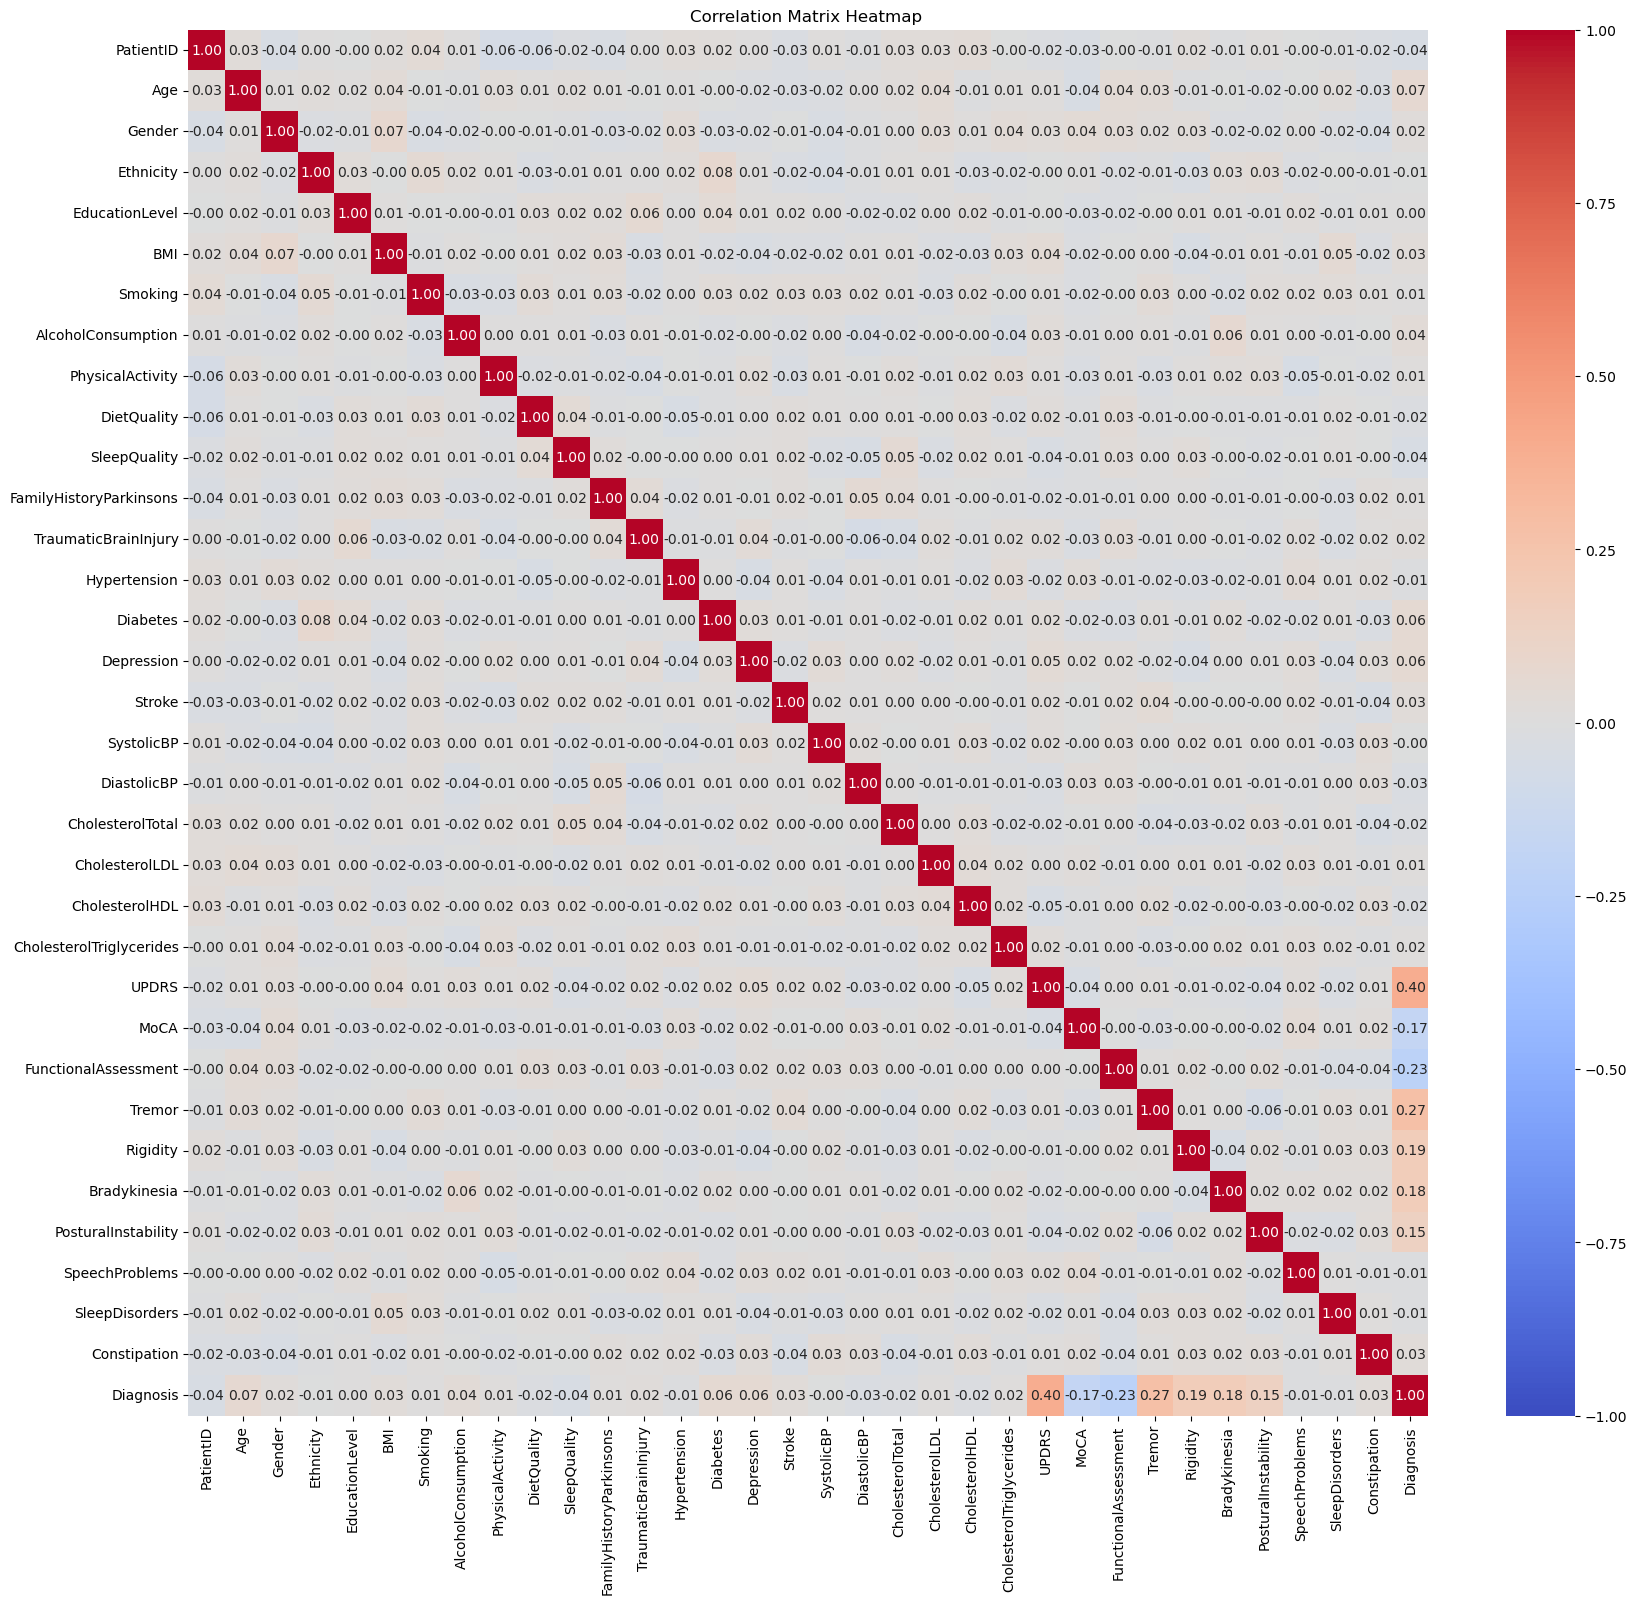

In [18]:
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1, cbar=True)
plt.title("Correlation Matrix Heatmap ")
plt.show()

This graph shows low correlations between variables, except for those I previously selected.

# Logistic Regression

Logistic regression is a supervised machine learning technique used for **binary classification**. The model predicts the probability that an observation belongs to one of two classes (e.g., 0 or 1).

---

### 1. Logistic Regression Formula

Logistic regression is based on the sigmoid function:

$$
P(y = 1 \mid X) = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where:

$$
z = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n
$$

The model generates a probability and classifies an observation as:

- **1** if $P(y = 1 \mid X) \geq 0.5$

- **0** otherwise.

---

### 2. Objective

The goal is to optimize the coefficients (\( w_0, w_1, ..., w_n \)) by minimizing a logarithmic loss function (Log-Loss):

$$
\text{Loss} = - \frac{1}{m} \sum_{i=1}^m \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

Where:
- $y_i$: the actual label (0 or 1).
- $\hat{y}_i$: the probability predicted by the model.





In [ ]:
features = ['UPDRS', 'Tremor', 'Rigidity', 'Bradykinesia', 
            'PosturalInstability', 'FunctionalAssessment', 'MoCA','Depression','Diabetes','Age']
target = 'Diagnosis'

X = df[features]  
y = df[target]   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()

model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

coefficients = pd.Series(model.coef_[0], index=features)
print("Coefficienti del modello:\n", coefficients)


Accuracy: 0.7980997624703088
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71       150
           1       0.83      0.86      0.85       271

    accuracy                           0.80       421
   macro avg       0.78      0.77      0.78       421
weighted avg       0.80      0.80      0.80       421

AUC-ROC: 0.8799261992619926
Coefficienti del modello:
 UPDRS                   0.025480
Tremor                  2.213180
Rigidity                1.716609
Bradykinesia            1.554178
PosturalInstability     1.978691
FunctionalAssessment   -0.303294
MoCA                   -0.071027
Depression              0.424489
Diabetes                0.203521
Age                     0.016348
dtype: float64


/Users/camillalabbate/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


NameError: name 'ConfusionMatrixDisplay' is not defined

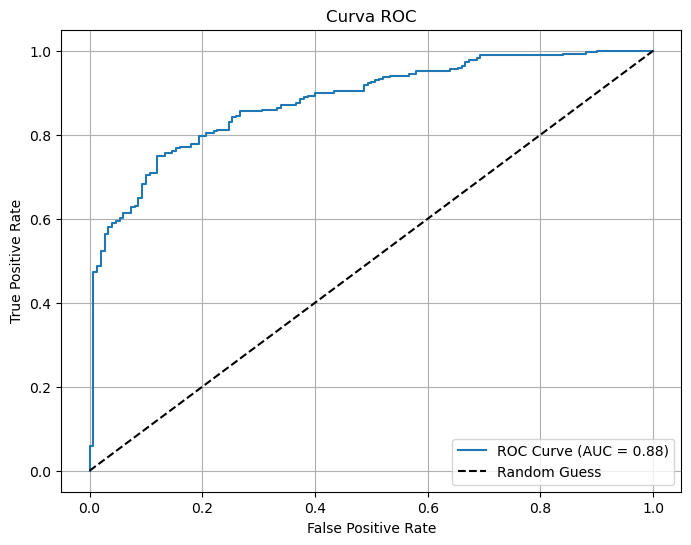

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")  # Linea di riferimento casuale
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid()
plt.show()


The displayed graph represents the **ROC Curve (Receiver Operating Characteristic)**, a tool used to evaluate the performance of a binary classifier.

---

### **Graph Components**
1. **Horizontal Axis (False Positive Rate - FPR)**:
   - Represents the percentage of false positives over the total number of negatives.
   - Formula: 
     $$
     FPR = \frac{FP}{FP + TN}
     $$


2. **Vertical Axis (True Positive Rate - TPR)**:
   - Represents the percentage of true positives over the total number of positives.
   - Formula: 
   $$
   TPR = \frac{TP}{TP + FN}
   $$


3. **Blue Line (ROC Curve)**:
   - Shows the trade-off between TPR and FPR at different classification thresholds.
   - In this case, the curve approaches the top-left corner, indicating good performance.

4. **Dashed Line (Random Guess)**:
   - Represents a random classifier (no predictive power).
   - It lies on the diagonal, where \( TPR = FPR \).

5. **AUC (Area Under the Curve)**:
   - Reported as **0.88**.
   - The AUC measures the model's overall ability to distinguish between the two classes:
     - \( AUC = 1.0 \): Perfect classification.
     - \( AUC = 0.5 \): Random classifier.

---

### **Interpretation**
- **Good performance**: With an AUC of **0.88**, the model demonstrates a high ability to distinguish between the two classes.
- **Trade-off**: The graph shows how the model's decisions change with different thresholds:
  - **Closer to the top-left corner**: Better predictive ability.
  - **Closer to the diagonal**: Poorer performance.

---

### **Conclusion**
This graph suggests that the model is effective for the binary classification problem, showing strong discrimination between the classes with a low false positive rate and a high true positive rate.